# Raditya Fahritama - Assignment 4


# 1

### Problem Statement
the problem states to perform following actions:

1.	Explore the datasets. 
2.	Find and handle missing values are in the data. 
3.	Explore the variable column and Convert the "variable” column to dummy variables and join the dummies to the data. 
4.	Convert the "one” column into 3 bins. 

###### input:
-


###### output:
- EDA of data
- joined dummy to the main data
- data with 3 bins on column 'one'


### Solution Design
1. create basic EDA of data
2. check missing values on the data. if found, insert with median values of the column
3. get dummies of 'variable' column and join the dummies to the main data
4. convert 'one' column in data to 3 bins 

###### assumption:
-


### Code

In [2]:
#!/usr/bin/ python3

"""this code section is to explore the data"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import the csv file
df = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/assignment 4/Assignment4_data.csv")
df

,one,two,three,four,five,variable
0,-92.0,-76.0,-33.0,3.0,-13.0,B2
1,-21.0,76.0,38.0,-6.0,80.0,B1
2,-2.0,-47.0,-34.0,-86.0,-66.0,A1
3,-76.0,43.0,7.0,-40.0,-42.0,A1
4,44.0,37.0,-7.0,-14.0,30.0,A1
...,...,...,...,...,...,...
195,63.0,3.0,-30.0,-24.0,-59.0,A1
196,97.0,-48.0,-61.0,-25.0,-21.0,B1
197,-93.0,-75.0,-18.0,-67.0,-58.0,B1
198,54.0,-66.0,-80.0,92.0,62.0,A1


In [3]:
#check null values in data
df.isnull().sum()

one         5
two         3
three       1
four        6
five        4
variable    0
dtype: int64

we can see that there are some missing values in the data. we will handle this with median values.

In [4]:
"""this chunk is to insert null values with median values of column"""

#assign missing columns
col = df.columns[:-1]

#loop for every data in columns containing missing values
for n in col:
    missing_col = [n]
    for i in missing_col:
        #insert with median values
        df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

#check again if there's still missing values
df.isnull().sum()

one         0
two         0
three       0
four        0
five        0
variable    0
dtype: int64

we can see that we have successfully handled the missing values

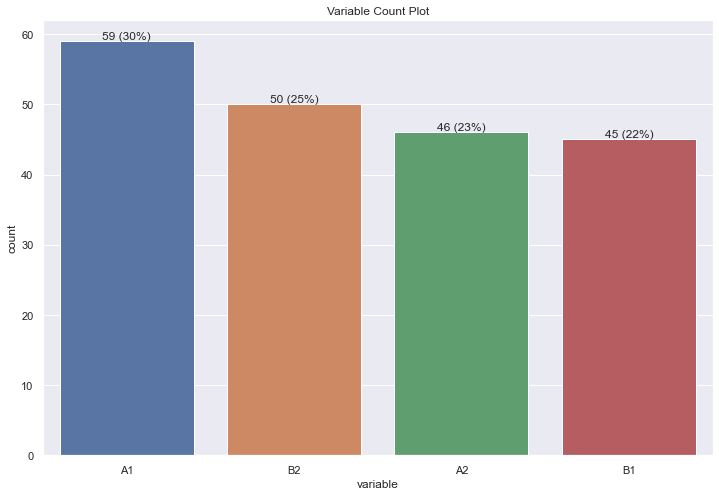

In [5]:
"""this chunk is to create count plot to interpret the variable column"""

sns.set(rc={'figure.figsize':(12,8)})

ax = sns.countplot(x=df['variable'],
                   order=df['variable'].value_counts(ascending=False).index)
        
abs_values = df['variable'].value_counts(ascending=False)
rel_values = df['variable'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title("Variable Count Plot")
plt.show()

from the plot, we can see that the values A1 has the most occurence in the data with 59 observations, followed by B2 with 50 observations, A2 with 46 observations, and B1 with least observations of 45 count. 

In [6]:
"""this chunk is to get dummies of the variable column"""

var = df[['variable']]
#get dummies of variable column
vardum = pd.get_dummies(var)
vardum

,variable_A1,variable_A2,variable_B1,variable_B2
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
195,1,0,0,0
196,0,0,1,0
197,0,0,1,0
198,1,0,0,0


In [7]:
#inserting dummies to the main dataframe
for i in vardum.columns:
    df[i] = vardum[i]
df

,one,two,three,four,five,variable,variable_A1,variable_A2,variable_B1,variable_B2
0,-92.0,-76.0,-33.0,3.0,-13.0,B2,0,0,0,1
1,-21.0,76.0,38.0,-6.0,80.0,B1,0,0,1,0
2,-2.0,-47.0,-34.0,-86.0,-66.0,A1,1,0,0,0
3,-76.0,43.0,7.0,-40.0,-42.0,A1,1,0,0,0
4,44.0,37.0,-7.0,-14.0,30.0,A1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
195,63.0,3.0,-30.0,-24.0,-59.0,A1,1,0,0,0
196,97.0,-48.0,-61.0,-25.0,-21.0,B1,0,0,1,0
197,-93.0,-75.0,-18.0,-67.0,-58.0,B1,0,0,1,0
198,54.0,-66.0,-80.0,92.0,62.0,A1,1,0,0,0


In [12]:
"""this part is to convert one column to 3 bins"""

#assign 3 bins with qcut
bin3 = pd.qcut(df['one'], q=3)
print(bin3)

0      (-363.001, -32.667]
1        (-32.667, 29.667]
2        (-32.667, 29.667]
3      (-363.001, -32.667]
4           (29.667, 97.0]
              ...         
195         (29.667, 97.0]
196         (29.667, 97.0]
197    (-363.001, -32.667]
198         (29.667, 97.0]
199         (29.667, 97.0]
Name: one, Length: 200, dtype: category
Categories (3, interval[float64, right]): [(-363.001, -32.667] < (-32.667, 29.667] < (29.667, 97.0]]


we can see that the 3 bins that were created are ranging from (-363.001, -32.667] < (-32.667, 29.667] < (29.667, 97.0]. these are the 30%/30%/30% cut from min value to max value

In [15]:
#replace values in one column with the bins
df['one'] = bin3
df

,one,two,three,four,five,variable,variable_A1,variable_A2,variable_B1,variable_B2
0,"(-363.001, -32.667]",-76.0,-33.0,3.0,-13.0,B2,0,0,0,1
1,"(-32.667, 29.667]",76.0,38.0,-6.0,80.0,B1,0,0,1,0
2,"(-32.667, 29.667]",-47.0,-34.0,-86.0,-66.0,A1,1,0,0,0
3,"(-363.001, -32.667]",43.0,7.0,-40.0,-42.0,A1,1,0,0,0
4,"(29.667, 97.0]",37.0,-7.0,-14.0,30.0,A1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
195,"(29.667, 97.0]",3.0,-30.0,-24.0,-59.0,A1,1,0,0,0
196,"(29.667, 97.0]",-48.0,-61.0,-25.0,-21.0,B1,0,0,1,0
197,"(-363.001, -32.667]",-75.0,-18.0,-67.0,-58.0,B1,0,0,1,0
198,"(29.667, 97.0]",-66.0,-80.0,92.0,62.0,A1,1,0,0,0


### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed



### Discussion

the program seems to run the intended solution well based on the output that it provided. the program solved the problem statement of the question number 1. 

# 2

### Problem Statement
the problem states to perform 3 actions from given string:
1.	Find out how many unique words in string
2.	Which word appears the most in string
3.	How many words start with ‘t’ in string

   
###### input:
-

###### output:
1. count of unique words
2. word that appears the most in string
3. count of words start with 't'


### Solution Design

- preprocess the data by stripping punctuation and lower the string 

first action
1. create list
2. for every words in string, append to list if not already in the list
3. count len of list

second action
1. import counter module
2. apply counter function with string split list

third action
1. create list and apply list comprehension with function startswith('t') for string split
2. count len of list

###### assumption:
-


### Code

In [117]:
#!/usr/bin/ python3

"""this module is to get the unique words, most occurence word, and get number of words that start with t"""

import string

#assign the string
s = "I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity. But one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languishing in the corners of American society and finds himself an exile in his own land. So we have come here today to dramatize a shameful condition."
#preprocess the string
s = s.translate(s.maketrans('', '', string.punctuation)).lower()
s

'i am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation five score years ago a great american in whose symbolic shadow we stand today signed the emancipation proclamation this momentous decree came as a great beacon light of hope to millions of negro slaves who had been seared in the flames of withering injustice it came as a joyous daybreak to end the long night of their captivity but one hundred years later the negro still is not free one hundred years later the life of the negro is still sadly crippled by the manacles of segregation and the chains of discrimination one hundred years later the negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity one hundred years later the negro is still languishing in the corners of american society and finds himself an exile in his own land so we have come here today to dramatize a shameful condition'

In [119]:
"""this chunk is to get the unique words in string"""

#assign list
duplist = []

#looping for every word in stirng
for i in s.split():
    if i not in duplist:
        #append the word
        duplist.append(i)

#sort the list alphabetically
duplist.sort()

print("Number of unique words : ",len(duplist))

Number of unique words :  107


In [19]:
"""this chunk is to count the word with most occurence"""

from collections import Counter

#apply Counter to string
wordcount = Counter(s.split()).most_common()
wordcount[0:5]

[('the', 14), ('of', 12), ('in', 8), ('a', 6), ('years', 5)]

we can see that "the" has the most occurence. but considering that the top 4 words that have the most occurences are all stopwords, we can assume that the word with most occurence is the word "years"

In [118]:
"""this module is to get count of words that start with t"""

#assign list and apply list comprehension
wordss = [t for t in s.split() if t.startswith('t')]

print("Number of words that start with T in string : ",len(wordss))

Number of words that start with T in string :  23


### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed




### Discussion
the program seems to run the intended solution well based on the output that it provided. the program solved the problem statement of the question number 2. 

# 3

### Problem Statement
the problem states to perform these actions:
1. Load and read Registration.csv and Course_info.xlsx using Pandas.
2. Explore and clean Registration data. 
3. Explore and clean Course_info data. 
4. get course with highest registration 
5. Inner join two datasets.

and create a dataframe with dummy style with course number as columns and student name as index.



###### input:
-

###### output:
1. clean data for both data
2. get course with high registration
3. joined dataframe of two data
5. dummy style dataframe


### Solution Design
1. import csv file to pandas dataframe
2. explore the data and clean the data by handling missing values
3. map the course values so that it can be joined with course registration
4. get the highest registration course with value count function
5. join the dataframes with merge inner style
6. create empty dataframe with course number as columns and student name as index and assign 1 to each registration records and 0 for the rest

###### assumption:
all the mapping values are correct

### Code

In [34]:
#!/usr/bin/ python3

"""this code is to load and read csv to dataframe"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#assign 2 different dataframes
dfreg = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/assignment 4/Registration.csv")
dfcor = pd.read_excel(r"D:/COURSE MATERIALS/Analytic Python/assignment 4/Course_info.xlsx")

In [35]:
dfreg

,Student name,semester new,coursename
0,Bill Mumy,Fall 2004,BEHAVIORAL PHARMACOLOGY
1,Bill Mumy,Fall 2000,AMERICAN FOREIGN POLICY
2,Bill Mumy,Fall 2003,"DRUGS, BRAIN AND MIND"
3,Bill Mumy,Fall 2005,Environmental Case Studies
4,Bill Mumy,Fall 2000,COMPUTER LINEAR ALGEBRA
...,...,...,...
4895,Stacy Keach,Summer 2001,CELL. BIOL. And BIOCHEM.
4896,Ann Landers,Summer 2004,AMERICAN HEALT POLICY
4897,Ann Landers,Summer 2004,ANALYTICAL MECHANICS
4898,Tyne Daly,Summer 2004,COMPUT LINEAR ALGEBRA


In [36]:
#check null
dfreg.isnull().sum()

Student name    0
semester new    0
coursename      1
dtype: int64

In [37]:
#remove null observation
dfreg = dfreg.dropna()
dfreg.isnull().sum()

Student name    0
semester new    0
coursename      0
dtype: int64

In [38]:
#check the unique courses in registration dataframe
corun = pd.DataFrame(dfreg['coursename'].unique())
corun = corun.sort_values(by=[0]).reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(corun)

     index                                                  0
0      164  1000 YRS MUSICAL LISTENG: 1000 YRS MUSICAL LIS...
1       19                              19TH-CENT BRITISH LIT
2      135                                    19TH-CENT NOVEL
3       68                           1ST YR CLASSICAL CHIN II
4      100                                   20TH-CENT POETRY
5       35  20th Century Russian Literature: Fiction and R...
6       13                                     A WORLD AT WAR
7       83                                ABNORMAL PSYCHOLOGY
8      158                           ACCEL INTERMD PORTUGUESE
9      157                            ACCEL INTERMEDIATE SPAN
10     108                                  ACCELERATED HINDI
11      52                           ACCELERATED INTERMD GRMN
12      47                                         AESTHETICS
13      23     AFGHANISTAN & ISLAMISM: AFGHANISTAN & ISLAMISM
14     145                            AFRICAN LANG. & CULTURE
15      

In [39]:
"""this chunk is to map all unique values in registration to course name in course dataframe"""

for i in range(len(dfreg)):
    x = dfreg.iloc[i]
    if x['coursename'] == "1000 YRS MUSICAL LISTENG: 1000 YRS MUSICAL LISTENG" or x['coursename'] == "19TH-CENT BRITISH LIT" or x['coursename'] == "19TH-CENT NOVEL" or x['coursename'] == "1ST YR CLASSICAL CHIN II":
        dfreg['coursename'].iloc[i] = "19TH-CENTURY BRITISH LITERATURE"
    elif x['coursename'] == "20TH-CENT POETRY":
        dfreg['coursename'].iloc[i] = "20th Century Russian Literature: Fiction and Reality"
    elif x['coursename'] == "ABNORMAL PSYCHOLOGY" or x['coursename'] == "ACCEL INTERMD PORTUGUESE" or x['coursename'] == "ACCEL INTERMEDIATE SPAN" or x['coursename'] == "ACCELERATED HINDI" or x['coursename'] == "ACCELERATED INTERMD GRMN":
        dfreg['coursename'].iloc[i] = "AESTHETICS"
    elif x['coursename'] == "AFGHANISTAN & ISLAMISM: AFGHANISTAN & ISLAMISM" or x['coursename'] == "AFRICAN LANG. & CULTURE" or x['coursename'] == "AFRICAN-AMERICAN LIT" or x['coursename'] == "AFRO AMER HIST 1876-PRES" or x['coursename'] == "AMER POST-1800: BF SEM: MODERN AMERICAN CITIES" or x['coursename'] == "AMER REVOLUTION" or x['coursename'] == "AMERICA IN THE 1960S":
        dfreg['coursename'].iloc[i] = "AFRICAN-AMERICAN LIT: AFRICAN-AMER LIT:CHANGE"
    elif x['coursename'] == "AMERICAN FOREIGN POLICY" or x['coursename'] == "AMERICAN HEALT POLICY":
        dfreg['coursename'].iloc[i] = "AMERICAN HEALTH POLICY"
    elif x['coursename'] == "AMERICAN MUSICAL THEATRE" or x['coursename'] == "AMERICAN POETRY"or x['coursename'] == "AMERICAN SOCIETY":
        dfreg['coursename'].iloc[i] = "AMERICAN SOCIAL POLICY"
    elif x['coursename'] == "ANAL METH ECON, LAW MED":
        dfreg['coursename'].iloc[i] = "ANALYTICAL MECHANICS"
    elif x['coursename'] == "ANCIENT ROME" or x['coursename'] == "ANTH & THE MODERN WORLD: Afghanistan, Iran, Pakistan" or x['coursename'] == "ANTH OF GLOBAL LABOR: Anthropology of Global Labor" or x['coursename'] == "ANTHROPOLOGY & CINEMA" or x['coursename'] == "ANTHROPOLOGY AND CINEMA" or x['coursename'] == "APPLIED MUSIC" or x['coursename'] == "ARCHAEOL GREC-ROM RELIG" or x['coursename'] == "ARCHAEOL OF PRIVATE LIFE" or x['coursename'] == "ARCHAEOLOGY OF THE INCA"or x['coursename'] == "ART & RELIGION" :
        dfreg['coursename'].iloc[i] = "ART AND RELIGION"
    elif x['coursename'] == "ART - ancient to 1945" or x['coursename'] == "ART, from ancient to 1945" or x['coursename'] == "ART ancient to 1945" or x['coursename'] == "ART - from ancient to 1945" or x['coursename'] == "ART AND BUSINESS OF FILM":
        dfreg['coursename'].iloc[i] = "ART: ancient to 1945"
    elif x['coursename'] == "ASIAN AMER COMM FLD WRK" or x['coursename'] == "AUGUSTAN CULTRL REVOL": 
        dfreg['coursename'].iloc[i] = "AUGUSTAN CULTRAL REVOLUTION"
    elif x['coursename'] == "BEING HUMAN: Being Human: Biology, Culture & Human Diversity": 
        dfreg['coursename'].iloc[i] = "BECOMING HUMAN"
    elif x['coursename'] == "BEHAVIORAL ECON & PSYCH": 
        dfreg['coursename'].iloc[i] = "BEHAVIORAL PHARMACOLOGY"
    elif x['coursename'] == "BRITAIN SINCE 1945": 
        dfreg['coursename'].iloc[i] = "BRITISH POETRY 1660-1914"
    elif x['coursename'] == "Business German - Micro Perspective" or x['coursename'] == "Business German A Micro Perspective" or x['coursename'] == "Business German, A Micro Perspective" or x['coursename'] == "BIBLE IN TRANSLATION: Proverbs, Ecclesiastes, and Job":
        dfreg['coursename'].iloc[i] = "Business German: A Micro Perspective"
    elif x['coursename'] == "BIOCHEMISTRY RESEARCH" or x['coursename'] == "BIOLOGICAL CHEMISTRY II" or x['coursename'] == "BEG RDG/WRTG CHINESE II" or x['coursename'] == "CEL BIO BIOCHEMISTRY" or x['coursename'] == "CEL and BIO and BIOCHEMISTRY" or x['coursename'] == "CELL BIOL & BIOCHEM" or x['coursename'] == "CELL BIOLOGY & BIOCHEM" or x['coursename'] == "CELL BIOLOGY and BIOCHEM" or x['coursename'] == "CELL BIOLOGY and BIOCHEMISTRY" or x['coursename'] == "CELL and BIO and BIOCHEMISTRY" or x['coursename'] == "CELL. BIOL. And BIOCHEM.":
        dfreg['coursename'].iloc[i] = "CELL. BIOL. & BIOCHEM."
    elif x['coursename'] == "COMM & THE PRESIDENCY" or x['coursename'] == "COMM and  THE PRESIDENCY" or x['coursename'] == "COGNITIVE PSYCHOLOGY": 
        dfreg['coursename'].iloc[i] = "COMM and THE PRESIDENCY"
    elif x['coursename'] == "COMMUNICATION BEHAVIOR" or x['coursename'] == "COMMUNICATIONS INTERNSHiP" or x['coursename'] == "COMM, CHILDHOOD, & PLAY": 
        dfreg['coursename'].iloc[i] = "COMMUNICATIONS INTERNSHP"
    elif x['coursename'] == "COMMUNITY MATH TEACH PRO" or x['coursename'] == "COMP POL. WELFARE STATE":
        dfreg['coursename'].iloc[i] = "COMPARATIVE POLITICS"
    elif x['coursename'] == "COMPUT LINEAR ALGEBRA":
        dfreg['coursename'].iloc[i] = "COMPUTER LINEAR ALGEBRA"
    elif x['coursename'] == "CONTEMP ART:1945 to PRESENT" or x['coursename'] == "CONTEMP ART - since 1945" or x['coursename'] == "CONTEMP ART - 1945 to today": 
        dfreg['coursename'].iloc[i] = "CONTEMP ART - 1945 to PRESENT"
    elif x['coursename'] == "CONTEMPORARY AFRICAN-ART" :
        dfreg['coursename'].iloc[i] = "CONTEMPORARY AFRICAN ART"
    elif x['coursename'] == "CONTMP POL,POLICY,JOURN" :
        dfreg['coursename'].iloc[i] = "CONTEMPORARY POL.THOUGHT"
    elif x['coursename'] == "CONTEMPORARY SOCIO THEOR":
        dfreg['coursename'].iloc[i] = "CONTEMPORARY SOCIO THEORY"
    elif x['coursename'] == "CONVERSATION & WRITING" or x['coursename'] == "CONVERSATION AND COMPOSI" or x['coursename'] == "CREAT.NON-FICTION WRIT: PEER TUTORING" or x['coursename'] == "CREATIVE WRITING: CREAT. WRITE: FICT/POET" or x['coursename'] == "CREATIVE WRITING: CREAT./POETRY & NON-FICT" or x['coursename'] == "CREATIVE WRITING: WRITING PERSONAL ESSAY" or x['coursename'] == "CRIME AND DETECTION: Dark Deeds" or x['coursename'] == "CURR ISSUES GLOBAL HEALT" or x['coursename'] == "Community Based Research on Health Disparities" or x['coursename'] == "DANTE'S DIVINE COMEDY" or x['coursename'] == "DIGITAL MEDIA & THE CITY": 
        dfreg['coursename'].iloc[i] = "DEVIL'S PACT LIT/FILM"
    elif x['coursename'] == "DIGITAL PHOTOGRAPHY" or x['coursename'] == "DNA, DIET, AND DISEASE: The Biology of Food" or x['coursename'] == "DOCUMENTARY WRITING" or x['coursename'] == "DRAMATURGY"or x['coursename'] == "DRUGS, BRAIN AND MIND"or x['coursename'] == "DRUGS, BRAIN, AND MIND"or x['coursename'] == "EARLY CINEMA": 
        dfreg['coursename'].iloc[i] = "EARLY BALCAN HIST/SOC"
    elif x['coursename'] == "EARLY MESOPOTAM HIST - SOC" or x['coursename'] == "EARLY MESOPOTAMIAN HIST - SOC" or x['coursename'] == "ECONOMETRIC FORECASTING" or x['coursename'] == "ECONOMETRICS"or x['coursename'] == "EDGAR ALLAM POE'S SCIEN"or x['coursename'] == "ELECTROMAG II":
        dfreg['coursename'].iloc[i] = "EARLY MESOPOTAM HISTORY/SOCIETY"
    elif x['coursename'] == "ELEM BIBLICAL HEBREW II"or x['coursename'] == "ELEM CLASSICAL GREEK II" or x['coursename'] == "ELEM MODERN HEBREW I"or x['coursename'] == "ELEM MODERN HEBREW II"or x['coursename'] == "ELEM PERSIAN II"or x['coursename'] == "ELEMENTARY FRENCH I"or x['coursename'] == "ELEMENTARY FRENCH II"or x['coursename'] == "ELEMENTARY GERMAN 1"or x['coursename'] == "ELEMENTARY GERMAN I": 
        dfreg['coursename'].iloc[i] = "ELEMENTARY ARABIC II"
    elif x['coursename'] == "ENERGY,OIL&GLOBAL WARMIN" or x['coursename'] == "ENVIRONMENTAL GEOLOGY":
        dfreg['coursename'].iloc[i] = "ENVIRONMENTAL SYSTEMS II"
    elif x['coursename'] == "EPIC TRADITIONS OF INDIA" or x['coursename'] == "EUR PRE-1800, BF SEM, UTOPIA" or x['coursename'] == "EUR PRE-1800: BF SEM: UTOPIA" or x['coursename'] == "EURO ART & CIV > 1400: RENAISSANCE TO CONTEMP"or x['coursename'] == "EURO INT'L REL SINCE WW One"or x['coursename'] == "EURO INT'L REL SINCE WW1"or x['coursename'] == "EURO INT'L REL SINCE WWI"or x['coursename'] == "EURO INTELL HIST 18 C.": 
        dfreg['coursename'].iloc[i] = "EUROPE IN A WIDER WORLD"  
    elif x['coursename'] == "EVIDENCED BASED CRIME & JUSTICE POLICY": 
        dfreg['coursename'].iloc[i] = "EVIDENCED BASED CRIME AND JUSTICE POLICY"
    elif x['coursename'] == "EXPERIMENTAL WRITING SEM": 
        dfreg['coursename'].iloc[i] = "EXPERIMENTAL WRITING SEM: The Ecology of Poetry"
    elif x['coursename'] == "EYE, MIND AND IMAGE"or x['coursename'] == "Environmental Case Studies"or x['coursename'] == "FICTION WRITING WORKSHOP"or x['coursename'] == "Environmental Studies Research Seminar for Juniors": 
        dfreg['coursename'].iloc[i] = "Environmental Studies Research Seminar Junior Level"
    elif x['coursename'] == "EYE, MIND AND IMAGE"or x['coursename'] == "FORENSIC ANTHROPOLOGY"or x['coursename'] == "FORMAL LOGIC I"or x['coursename'] == "FORMAL SEM AND COG SCI"or x['coursename'] == "FR FOR PROFESSIONS I"or x['coursename'] == "FR FOR PROFESSIONS II"or x['coursename'] == "FR LIT OF THE 19TH C: STUDIES IN THE 19TH C.":
        dfreg['coursename'].iloc[i] = "FRANCE & THE EUROP.UNION"
    elif x['coursename'] == "Feminist Theory: Feminism, Activism, and the Body"or x['coursename'] == "FRENCH PHONETICS"or x['coursename'] == "FREEDOM OF EXPRESSION"or x['coursename'] == "FRANCE AND ITS OTHERS: Anthropology and French Modernism" or x['coursename'] == "ANIMAL BEHAVIOR" or x['coursename'] == "ANIMAL COGNITION": 
        dfreg['coursename'].iloc[i] = "French Thought Since 1945"

C:\Users\USER-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
dfcor

,Course number,Course Name,Course Type
0,ARTS400,EXPERIMENTAL WRITING SEM: The Ecology of Poetry,C
1,ARTS401,ART: ancient to 1945,C
2,ARTS465,ENVIRONMENTAL SYSTEMS II,F
3,ARTS486,COMPUTER LINEAR ALGEBRA,F
4,ARTS512,ANALYTICAL MECHANICS,F
5,ARTS514,A WORLD AT WAR,F
6,ARTS516,BEHAVIORAL PHARMACOLOGY,F
7,ARTS518,CONTEMPORARY AFRICAN ART,F
8,ARTS520,FOOD/FEAST ARCH OF TABLE,F
9,ARTS488,DEVIL'S PACT LIT/FILM,E


we can see that there's 1 null and duplicate courses

In [41]:
#check null in course
dfcor.isnull().sum()

Course number    0
Course Name      1
Course Type      0
dtype: int64

In [42]:
#drop null in course
dfcor = dfcor.dropna()
dfcor.isnull().sum()

Course number    0
Course Name      0
Course Type      0
dtype: int64

In [43]:
#drop duplicate in course
dfcor = dfcor.drop_duplicates(subset=['Course Name '])

In [44]:
#renaming column so that it can be joined
dfcor = dfcor.rename(columns={"Course Name ": "coursename"})
#sort by course number
dfcor = dfcor.sort_values(by=['Course number']).reset_index(drop = True)
dfcor

,Course number,coursename,Course Type
0,ARTS400,EXPERIMENTAL WRITING SEM: The Ecology of Poetry,C
1,ARTS401,ART: ancient to 1945,C
2,ARTS465,ENVIRONMENTAL SYSTEMS II,F
3,ARTS484,EUROPE IN A WIDER WORLD,E
4,ARTS485,EVIDENCED BASED CRIME AND JUSTICE POLICY,E
5,ARTS486,COMPUTER LINEAR ALGEBRA,F
6,ARTS488,DEVIL'S PACT LIT/FILM,E
7,ARTS491,CONTEMPORARY POL.THOUGHT,E
8,ARTS492,AFRICAN-AMERICAN LIT: AFRICAN-AMER LIT:CHANGE,E
9,ARTS493,AMERICAN HEALTH POLICY,E


In [45]:
"""this chunk is to get the highest registration course"""

#apply value count function
highestreg = dfreg['coursename'].value_counts()
print("Course with highest registration is : ",highestreg.index[0])

Course with highest registration is :  Environmental Studies Research Seminar Junior Level


In [46]:
"""this chunk is to join the two dataframe in coursename column"""

#inner join two dataframes
dfjoined = pd.merge(dfreg, dfcor, on='coursename', how='inner')
#drop duplicates and reset index
dfjoined = dfjoined.drop_duplicates().reset_index(drop = True)
#sort df by student name
dfjoined = dfjoined.sort_values(by=['Student name']).reset_index(drop = True)
dfjoined

,Student name,semester new,coursename,Course number,Course Type
0,ABella Abzug,Fall 2005,COMPARATIVE POLITICS,ARTS581,E
1,ABella Abzug,Fall 2004,ANALYTICAL MECHANICS,ARTS512,F
2,ABella Abzug,Fall 2003,Environmental Studies Research Seminar Junior ...,ARTS565,E
3,ABella Abzug,Fall 2005,FOOD/FEAST ARCH OF TABLE,ARTS520,F
4,ABella Abzug,Spring 2001,DEVIL'S PACT LIT/FILM,ARTS488,E
...,...,...,...,...,...
3577,state representative,Spring 2003,CONTEMPORARY AFRICAN ART,ARTS518,F
3578,state representative,Fall 2004,Environmental Studies Research Seminar Junior ...,ARTS565,E
3579,state representative,Fall 2004,ART: ancient to 1945,ARTS401,C
3580,state representative,Spring 2001,BEHAVIORAL PHARMACOLOGY,ARTS516,F


In [377]:
"""this part is to create the final dataframe"""

#assign course number and student name as the index and column name
coursecol = np.sort(dfjoined['Course number'].unique())
nameindex = np.sort(dfjoined['Student name'].unique())
dffinal = pd.DataFrame(index=[nameindex], columns=[coursecol])

In [382]:
#loop for every observation in joined dataframe
for i in range(len(dfjoined)):
    name = dfjoined.iloc[i]['Student name']
    course = dfjoined.iloc[i]['Course number']
    #assign 1 for every name and course number found in observation
    dffinal.at[name,course] = 1

#Fill nan with 0 for courses that are not present 
dffinal = dffinal.fillna(0)

In [383]:
dffinal

,ARTS400,ARTS401,ARTS465,ARTS484,ARTS485,ARTS486,ARTS488,ARTS491,ARTS492,ARTS493,...,ARTS565,ARTS569,ARTS571,ARTS573,ARTS575,ARTS579,ARTS581,ARTS583,ARTS585,ARTS587
ABella Abzug,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
Al Gore,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
Al Hirt,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
Al Roker,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Alan Alda,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winona Ryder,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Wolfgang Puck,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
Yogi Berra,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Yoko Ono,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed


### Discussion
the program seems to run the intended solution well based on the output that it provided. i manually map all the non uniform course name and i will assume that they are correct. i believe that there's a better way to resolve the problem. but right now, that's the way that i can think of. but eventually, the program solved the problem statement of the question number 3. 

# 4

### Problem Statement
the problem states to perform these actions:
1. Set the class labels ‘benign’ as 0 and ‘malignant’ as 1 
2. create another variable ‘cell_type_label’ which has two categorical values ‘normal’ and ‘abnormal’ depending on conditions
3. get subset for abnormal

and do the problem from problem 8 in inclass activity


###### input:
-

###### output:
1. dataframe with cell label and assigned class label
2. data aggregation
3. data count of the class


### Solution Design
1. import csv file to pandas dataframe
2. set the class to 0 and 1 
3. loop over data and see if the matching condition can set the cell type label as abnormal or normal
4. aggregate data with min, max, and mean of the column
5. see value count of class

###### assumption:
-

In [52]:
#!/usr/bin/ python3
"""this module is to solve problem number 4"""

import pandas as pd
import numpy as np

#load csv to dataframe
df = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/assignment 4/Breast_cancer-1.csv")
df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


In [53]:
"""this chunk is to set class label with dictionary"""

#create map dictionary
di = {"benign": 0, "malignant": 1}
#replace class with value from dictionary
df.replace({"class": di})

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,1,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,1,Dr. Lee


In [54]:
"""this chunk is to assign cell type label based on condition"""

#assign empty list
celllab = []

#loop for every data in dataframe
for i in range(len(df)):
    x = df.iloc[i]
    #apply condition to the data append
    if x["cell_size_uniformity"] > 5 and x["cell_shape_uniformity"] > 6:
        celllab.append("normal")
    else:
        celllab.append("abnormal")

#assign column by list
df["cell_type_label"] = celllab
df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name,cell_type_label
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe,abnormal
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith,abnormal
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee,abnormal
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith,normal
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee,abnormal
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith,abnormal
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee,normal
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee,abnormal


In [51]:
"""this chunk is to get subset of abnormal cell label"""
#get the subset with abnormal condition
df[df["cell_type_label"] == "abnormal"]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name,cell_type_label
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,Dr. Doe,abnormal
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,Dr. Smith,abnormal
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,Dr. Lee,abnormal
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,Dr. Wong,abnormal
6,1018099,1.0,NaN,1,1,2,10,3.0,1.0,1,0,Dr. Doe,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,714039,3.0,1.0,1,1,2,1,1.0,1.0,1,0,Dr. Wong,abnormal
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,0,Dr. Lee,abnormal
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,Dr. Lee,abnormal
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,Dr. Smith,abnormal


In [107]:
"""this part is to solve the inclass activity problem"""

#get aggregation of min max and mean of the columns
df.agg(maxc=('cell_size_uniformity', max), minc=('cell_size_uniformity', 'min'), meanc=('normal_nucleoli', np.mean))

,cell_size_uniformity,normal_nucleoli
maxc,10.0,NaN
minc,1.0,NaN
meanc,NaN,2.868195


In [108]:
#get the value counts for every class
df['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

with 0 as benign and 1 as malignant

### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed


### Discussion
the program seems to run the intended solution well based on the output that it provided. the program solved the problem statement of the question number 4. 